<center><h1> IFT-6758 - Science des données </h1></center>
<center><h2> Automne - 2023 </h2></center>
<center><h3> Labo - 1</h3></center>
<center><h3> </h3></center>
<center><h3> Pandas</h3></center>



**pandas** vient de l'expression "panel data", un terme de l'économétrie qui décrit une base de données avec des observations sur plusieurs périodes pour les mêmes individus.
[[Source](https://www.dlr.de/sc/Portaldata/15/Resources/dokumente/pyhpc2011/submissions/pyhpc2011_submission_9.pdf) : *pandas: a Foundational Python Library for Data Analysis and Statistics" -  Wes McKinney*]

**pandas** a été construit en utilisant la librairie **numpy**, ce qui fait qu'on peut l'utiliser avec **scipy**, **matplotlib** et **scikit-learn**.

### Installation
Sur Google colab `pandas` est déjà installé

In [1]:
!pip install pandas

### Importer

L'alias `pd` est une convention utilisé par la majorité d'utilisateurs

In [2]:
import pandas as pd

In [3]:
!wget https://raw.githubusercontent.com/Jhelum-Ch/DataScience_IFT6758/gh-pages/media/sales.csv

--2023-09-11 21:55:57--  https://raw.githubusercontent.com/Jhelum-Ch/DataScience_IFT6758/gh-pages/media/sales.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1037 (1.0K) [text/plain]
Saving to: ‘sales.csv’

sales.csv           100%[===================>]   1.01K  --.-KB/s    in 0s      

2023-09-11 21:55:57 (48.8 MB/s) - ‘sales.csv’ saved [1037/1037]



## [1] CRÉER

### (a) Créer à partir d'un fichier

Créer un  `DataFrame` en lisant les valeurs d'un fichier CSV.

In [ ]:
df = pd.read_csv('sales.csv')

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/Jhelum-Ch/DataScience_IFT6758/gh-pages/media/sales.csv')
df.columns

Index(['Country', 'Region', 'Sales Person', 'Date of Purchase', 'Total',
       'Quantity'],
      dtype='object')

**Types de données clés**

`Series` -	Tableau 1D  d'un seul type

`DataFrame`	- Structure modifiable générale 2D ressemblant à un tableau avec des colonnes de type potentiellement hétérogènes.

![https://bookdata.readthedocs.io/en/latest/_images/base_01_pandas_5_0.png](https://bookdata.readthedocs.io/en/latest/_images/base_01_pandas_5_0.png)

[Source : https://bookdata.readthedocs.io]

Voir la structure générale du `DataFrame`.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Country           20 non-null     object
 1   Region            20 non-null     object
 2   Sales Person      20 non-null     object
 3   Date of Purchase  20 non-null     object
 4   Total             20 non-null     int64 
 5   Quantity          20 non-null     int64 
dtypes: int64(2), object(4)
memory usage: 1.1+ KB


Voir le type de données du `DataFrame`.

In [ ]:
type(df)

pandas.core.frame.DataFrame

Voir le type de données de chaque colonne du `DataFrame`.

In [ ]:
df.dtypes

Country             object
Region              object
Sales Person        object
Date of Purchase    object
Total                int64
Quantity             int64
dtype: object

Voir la forme du `DataFrame`.

In [ ]:
df.shape

(20, 6)

Voir le nom des colonnes du `DataFrame`.

In [ ]:
df.columns

Index(['Country', 'Region', 'Sales Person', 'Date of Purchase', 'Total',
       'Quantity'],
      dtype='object')

Obtenir l'indice des rangées du `DataFrame`.

In [ ]:
df.index

RangeIndex(start=0, stop=20, step=1)

Voir le `DataFrame` au complet.

In [ ]:
df

         Country Region Sales Person    Date of Purchase     Total  Quantity
0          India  North         John  12/25/2016 0:00:00    100000       567
1             US  North         Bill   1/20/2012 0:00:00    120000      3000
2             UK  North       Thomas   3/30/2011 0:00:00    140000       345
3      Australia   East         John   1/11/2014 0:00:00    160000      1000
4   South Africa   East         Bill    7/9/2010 0:00:00    180000       123
5      Singapore   East       Thomas   4/15/2015 0:00:00    200000      1000
6       Malaysia   West         John   9/26/2010 0:00:00   1000000      7890
7          India   West         Bill   9/29/2014 0:00:00    240000       200
8             US   West       Thomas   11/7/2011 0:00:00  26000000      1000
9             UK  North         John  11/10/2014 0:00:00    100000      1000
10     Australia  North         Bill    9/1/2015 0:00:00    120000       567
11  South Africa  North       Thomas  10/19/2016 0:00:00    140000      1000

Voir les statistiques du `DataFrame`.

In [ ]:
df.describe()

,Total,Quantity
count,2.000000e+01,20.000000
mean,1.502500e+06,977.900000
std,5.769280e+06,1761.923497
min,1.000000e+05,85.000000
25%,1.400000e+05,90.000000
50%,1.700000e+05,505.500000
75%,2.250000e+05,1000.000000
max,2.600000e+07,7890.000000


Afficher un histogramme de base sur le `DataFrame`.

array([[<Axes: title={'center': 'Total'}>]], dtype=object)

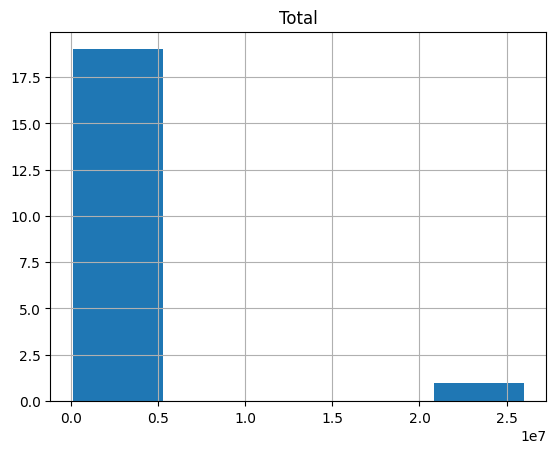

In [8]:
df.hist('Total', bins=5)

### (b) Créer à partir de structure de données

![Source: https://pbpython.com](https://pbpython.com/images/pandas-dataframe-shadow.png)


Source: https://pbpython.com

**Par colonne : Dictionnaire de listes**

Les données sont un dictionnaire avec le nom des colonnes comme clés et les valeurs sont une liste des valeurs pour la colonne.

In [ ]:
cols_dict = {
    'city_name': ['San Francisco', 'San Jose', 'Sacramento'],
    'population': [852469, 1015785, 485199]
}

pd.DataFrame(cols_dict)

,city_name,population
0,San Francisco,852469
1,San Jose,1015785
2,Sacramento,485199


**Par rangée : Liste de dictionnaires**

Data est une liste de dictionnaires dont les dictionnaires ont comme clés les noms de colonne et comme valeur, la valeur pour cette cellule.

In [ ]:
rows_dict = [{'city_name': 'San Francisco', 'population':852469},
             {'city_name': 'San Jose', 'population': 1015785},
             {'city_name': 'Sacramento', 'population': 485199}]

pd.DataFrame(rows_dict)

,city_name,population
0,San Francisco,852469
1,San Jose,1015785
2,Sacramento,485199


**Par rangée : Liste de tuples**

Les données sont une liste dont les valeurs des rangées sont des tuples. Les noms de colonnes sont spécifiées comme une liste

In [ ]:
rows_dict = [('San Francisco', 852469),
             ('San Jose', 1015785),
             ('Sacramento', 485199)]
labels = ['city_name', 'population']

pd.DataFrame(rows_dict, columns=labels)

# pd.DataFrame(rows_dict)

,city_name,population
0,San Francisco,852469
1,San Jose,1015785
2,Sacramento,485199


Différent indices peuvent être spécifiés par `index`

In [ ]:
pd.DataFrame(cols_dict, index=[104,108,111])

,city_name,population
104,San Francisco,852469
108,San Jose,1015785
111,Sacramento,485199


**Par colonne : Dictionnaire de Series**

Les données sont un dictionnaire dont les noms de colonnes sont des clés et les données sont passées comme Series.

In [ ]:
city_names = pd.Series(['San Francisco', 'San Jose', 'Sacramento'])
populations = pd.Series([852469, 1015785, 485199])

pd.DataFrame({ 'city_name': city_names, 'population': populations })

,city_name,population
0,San Francisco,852469
1,San Jose,1015785
2,Sacramento,485199


**Sauvegarder `DataFrame` à un fichier CSV**

In [ ]:
cities_df = pd.DataFrame({ 'city_name': city_names, 'population': populations })
cities_df.to_csv('cities.csv')

In [ ]:
pd.read_csv('cities.csv')

## [2] LIRE

In [ ]:
df = pd.read_csv('sales.csv')

In [ ]:
df.head()

,Country,Region,Sales Person,Date of Purchase,Total,Quantity
0,India,North,John,12/25/2016 0:00:00,100000,567
1,US,North,Bill,1/20/2012 0:00:00,120000,3000
2,UK,North,Thomas,3/30/2011 0:00:00,140000,345
3,Australia,East,John,1/11/2014 0:00:00,160000,1000
4,South Africa,East,Bill,7/9/2010 0:00:00,180000,123
5,Singapore,East,Thomas,4/15/2015 0:00:00,200000,1000
6,Malaysia,West,John,9/26/2010 0:00:00,1000000,7890
7,India,West,Bill,9/29/2014 0:00:00,240000,200
8,US,West,Thomas,11/7/2011 0:00:00,26000000,1000
9,UK,North,John,11/10/2014 0:00:00,100000,1000


In [ ]:
df.tail(3)

,Country,Region,Sales Person,Date of Purchase,Total,Quantity
17,Australia,West,Thomas,10/24/2012 0:00:00,260000,90
18,South Africa,North,John,10/1/2013 0:00:00,140000,85
19,Singapore,North,Bill,9/21/2012 0:00:00,150000,85


In [ ]:
df.sample(5)

,Country,Region,Sales Person,Date of Purchase,Total,Quantity
3,Australia,East,John,1/11/2014 0:00:00,160000,1000
7,India,West,Bill,9/29/2014 0:00:00,240000,200
9,UK,North,John,11/10/2014 0:00:00,100000,1000
1,US,North,Bill,1/20/2012 0:00:00,120000,3000
16,UK,West,Bill,10/24/2014 0:00:00,240000,90


In [ ]:
df['Sales Person']

0       John
1       Bill
2     Thomas
3       John
4       Bill
5     Thomas
6       John
7       Bill
8     Thomas
9       John
10      Bill
11    Thomas
12      John
13      Bill
14    Thomas
15      John
16      Bill
17    Thomas
18      John
19      Bill
Name: Sales Person, dtype: object

In [9]:
df.Country

0            India
1               US
2               UK
3        Australia
4     South Africa
5        Singapore
6         Malaysia
7            India
8               US
9               UK
10       Australia
11    South Africa
12       Singapore
13        Malaysia
14           India
15              US
16              UK
17       Australia
18    South Africa
19       Singapore
Name: Country, dtype: object

Voir le type de données d'une colonne.

In [ ]:
type(df.Quantity)

pandas.core.series.Series

Voir le type de données d'une colonne (alternative)

In [10]:
df.Quantity.dtypes

dtype('int64')

In [ ]:
df[['Country','Quantity']]

,Country,Quantity
0,India,567
1,US,3000
2,UK,345
3,Australia,1000
4,South Africa,123
5,Singapore,1000
6,Malaysia,7890
7,India,200
8,US,1000
9,UK,1000


In [ ]:
for col in df.columns:
  print(col)

Country
Region
Sales Person
Date of Purchase
Total
Quantity


In [ ]:
mask = df.Country=='UK'
mask

0     False
1     False
2      True
3     False
4     False
5     False
6     False
7     False
8     False
9      True
10    False
11    False
12    False
13    False
14    False
15    False
16     True
17    False
18    False
19    False
Name: Country, dtype: bool

In [ ]:
df[(df['Country']=='UK') & (df['Region'] =='North')]

,Country,Region,Sales Person,Date of Purchase,Total,Quantity
2,UK,North,Thomas,3/30/2011 0:00:00,140000,345
9,UK,North,John,11/10/2014 0:00:00,100000,1000


In [ ]:
df[df.Quantity >= 1000]

,Country,Region,Sales Person,Date of Purchase,Total,Quantity
1,US,North,Bill,1/20/2012 0:00:00,120000,3000
3,Australia,East,John,1/11/2014 0:00:00,160000,1000
5,Singapore,East,Thomas,4/15/2015 0:00:00,200000,1000
6,Malaysia,West,John,9/26/2010 0:00:00,1000000,7890
8,US,West,Thomas,11/7/2011 0:00:00,26000000,1000
9,UK,North,John,11/10/2014 0:00:00,100000,1000
11,South Africa,North,Thomas,10/19/2016 0:00:00,140000,1000


In [ ]:
df[df.Quantity >= 1000]['Country']

1               US
3        Australia
5        Singapore
6         Malaysia
8               US
9               UK
11    South Africa
Name: Country, dtype: object

In [ ]:
df[df.Quantity >= 1000]['Country'].head()

1           US
3    Australia
5    Singapore
6     Malaysia
8           US
Name: Country, dtype: object

In [ ]:
df['Country'][df.Quantity >= 1000]

In [ ]:
df[(df.Quantity >= 1000) & (df.Country=='US')]

In [ ]:
df.query(" Quantity>=1000  and Country=='US' ")

,Country,Region,Sales Person,Date of Purchase,Total,Quantity
1,US,North,Bill,1/20/2012 0:00:00,120000,3000
8,US,West,Thomas,11/7/2011 0:00:00,26000000,1000


In [ ]:
df[df['Country'].isin(['UK','US','India'])]

,Country,Region,Sales Person,Date of Purchase,Total,Quantity
0,India,North,John,12/25/2016 0:00:00,100000,567
1,US,North,Bill,1/20/2012 0:00:00,120000,3000
2,UK,North,Thomas,3/30/2011 0:00:00,140000,345
7,India,West,Bill,9/29/2014 0:00:00,240000,200
8,US,West,Thomas,11/7/2011 0:00:00,26000000,1000
9,UK,North,John,11/10/2014 0:00:00,100000,1000
14,India,East,Thomas,4/15/2018 0:00:00,200000,90
15,US,West,John,3/5/2012 0:00:00,220000,90
16,UK,West,Bill,10/24/2014 0:00:00,240000,90


In [ ]:
df.Country == "US"

Requêtes conditionelles qui utilisent un masque booléen.

In [ ]:
american = df.Country == "US"

heavy = df.Quantity > 1000

df[american & heavy]

On peut indexer par nom de colonne ou de rangée en utilisant loc. `.loc[]` utilise principalement des noms mais peut aussi prendre un tableau de booléens.

`dataFrame.loc[<INTERVALLE DE RANGÉES> , <INTERVALLE DE COLONNES>]`

On peut aussi passer ‘:’ pour spécifier de prendre toutes les rangées ou colonnes.

In [ ]:
df.loc[2:5,'Country']

2              UK
3       Australia
4    South Africa
5       Singapore
Name: Country, dtype: object

In [ ]:
df.loc[2:5,['Country','Quantity']]

,Country,Quantity
2,UK,345
3,Australia,1000
4,South Africa,123
5,Singapore,1000


In [ ]:
df.loc[2:5, 'Sales Person':'Total']

,Sales Person,Date of Purchase,Total
2,Thomas,3/30/2011 0:00:00,140000
3,John,1/11/2014 0:00:00,160000
4,Bill,7/9/2010 0:00:00,180000
5,Thomas,4/15/2015 0:00:00,200000


In [ ]:
df.loc[11::2]

,Country,Region,Sales Person,Date of Purchase,Total,Quantity
11,South Africa,North,Thomas,10/19/2016 0:00:00,140000,1000
13,Malaysia,East,Bill,10/3/2014 0:00:00,180000,444
15,US,West,John,3/5/2012 0:00:00,220000,90
17,Australia,West,Thomas,10/24/2012 0:00:00,260000,90
19,Singapore,North,Bill,9/21/2012 0:00:00,150000,85


In [ ]:
df.loc[11,:]

Country                   South Africa
Region                           North
Sales Person                    Thomas
Date of Purchase    10/19/2016 0:00:00
Total                           140000
Quantity                          1000
Name: 11, dtype: object

In [ ]:
df.loc[[11,17],:]

,Country,Region,Sales Person,Date of Purchase,Total,Quantity
11,South Africa,North,Thomas,10/19/2016 0:00:00,140000,1000
17,Australia,West,Thomas,10/24/2012 0:00:00,260000,90


Pour indexer un `DataFrame` par colonne ou rangée selon leur position, on utilise `iloc`.

`dataFrame.iloc[<INTERVALLE INDEX RANGÉE> , <INTERVALLE INDEX COLONNE>]`

Encore une fois, on peut utiliser ‘:’ d'une manière similaire

In [ ]:
df.iloc[0]

Country                          India
Region                           North
Sales Person                      John
Date of Purchase    12/25/2016 0:00:00
Total                           100000
Quantity                           567
Name: 0, dtype: object

In [ ]:
df.iloc[0,0]

'India'

In [ ]:
df.iloc[::2,::2]

,Country,Sales Person,Total
0,India,John,100000
2,UK,Thomas,140000
4,South Africa,Bill,180000
6,Malaysia,John,1000000
8,US,Thomas,26000000
10,Australia,Bill,120000
12,Singapore,John,160000
14,India,Thomas,200000
16,UK,Bill,240000
18,South Africa,John,140000


In [ ]:
df.iloc[[11,13,17],[2,5]]

,Sales Person,Quantity
11,Thomas,1000
13,Bill,444
17,Thomas,90


## [3] Changer



Ajouter à un Dataframe

In [ ]:
new_df = pd.DataFrame([{'Country':'Singapore', 'Region':'North'	, 'Sales Person':'Bill'	, 'Date of Purchase':'9/21/2012 0:00:00'	, 'Total':'150000' ,	'Quantity':85}])
new_df = df.iloc[-1,:]
new_df = df.append(new_df, ) # New copy
new_df

,Country,Region,Sales Person,Date of Purchase,Total,Quantity
0,India,North,John,12/25/2016 0:00:00,100000,567
1,US,North,Bill,1/20/2012 0:00:00,120000,3000
2,UK,North,Thomas,3/30/2011 0:00:00,140000,345
3,Australia,East,John,1/11/2014 0:00:00,160000,1000
4,South Africa,East,Bill,7/9/2010 0:00:00,180000,123
5,Singapore,East,Thomas,4/15/2015 0:00:00,200000,1000
6,Malaysia,West,John,9/26/2010 0:00:00,1000000,7890
7,India,West,Bill,9/29/2014 0:00:00,240000,200
8,US,West,Thomas,11/7/2011 0:00:00,26000000,1000
9,UK,North,John,11/10/2014 0:00:00,100000,1000


In [ ]:
new_df.shape

(21, 6)

In [ ]:
df.shape

(20, 6)

In [ ]:
new_df

,Country,Region,Sales Person,Date of Purchase,Total,Quantity
0,India,North,John,12/25/2016 0:00:00,100000,567
1,US,North,Bill,1/20/2012 0:00:00,120000,3000
2,UK,North,Thomas,3/30/2011 0:00:00,140000,345
3,Australia,East,John,1/11/2014 0:00:00,160000,1000
4,South Africa,East,Bill,7/9/2010 0:00:00,180000,123
5,Singapore,East,Thomas,4/15/2015 0:00:00,200000,1000
6,Malaysia,West,John,9/26/2010 0:00:00,1000000,7890
7,India,West,Bill,9/29/2014 0:00:00,240000,200
8,US,West,Thomas,11/7/2011 0:00:00,26000000,1000
9,UK,North,John,11/10/2014 0:00:00,100000,1000


In [ ]:
new_df.iloc[20,:]

In [ ]:
new_df.drop_duplicates(inplace=True)   #inplace=True, keep=False
new_df
# new_df

,Country,Region,Sales Person,Date of Purchase,Total,Quantity
0,India,North,John,12/25/2016 0:00:00,100000,567
1,US,North,Bill,1/20/2012 0:00:00,120000,3000
2,UK,North,Thomas,3/30/2011 0:00:00,140000,345
3,Australia,East,John,1/11/2014 0:00:00,160000,1000
4,South Africa,East,Bill,7/9/2010 0:00:00,180000,123
5,Singapore,East,Thomas,4/15/2015 0:00:00,200000,1000
6,Malaysia,West,John,9/26/2010 0:00:00,1000000,7890
7,India,West,Bill,9/29/2014 0:00:00,240000,200
8,US,West,Thomas,11/7/2011 0:00:00,26000000,1000
9,UK,North,John,11/10/2014 0:00:00,100000,1000


Tableau de zéros

In [ ]:
new_df.shape

Renommer colonnes

In [ ]:
new_df.columns = ['country','region','person','date','total','quantity']
# new_df.columns = [col.lower() for col in new_df.columns]
new_df.tail()

,country,region,person,date,total,quantity
15,US,West,John,3/5/2012 0:00:00,220000,90
16,UK,West,Bill,10/24/2014 0:00:00,240000,90
17,Australia,West,Thomas,10/24/2012 0:00:00,260000,90
18,South Africa,North,John,10/1/2013 0:00:00,140000,85
19,Singapore,North,Bill,9/21/2012 0:00:00,150000,85


Alternativement, on peut utiliser `rename`.



In [ ]:
new_df.rename(columns={
        'region': 'zone',
        'quantity': 'qty'
    }, inplace=True)


new_df.columns

Index(['country', 'zone', 'person', 'date', 'total', 'qty'], dtype='object')

Tableau d'une plage de numéros

In [ ]:
new_df.loc[11::2,'qty'] *= 100

new_df

,country,zone,person,date,total,qty
0,India,North,John,12/25/2016 0:00:00,100000,567
1,US,North,Bill,1/20/2012 0:00:00,120000,3000
2,UK,North,Thomas,3/30/2011 0:00:00,140000,345
3,Australia,East,John,1/11/2014 0:00:00,160000,1000
4,South Africa,East,Bill,7/9/2010 0:00:00,180000,123
5,Singapore,East,Thomas,4/15/2015 0:00:00,200000,1000
6,Malaysia,West,John,9/26/2010 0:00:00,1000000,7890
7,India,West,Bill,9/29/2014 0:00:00,240000,200
8,US,West,Thomas,11/7/2011 0:00:00,26000000,1000
9,UK,North,John,11/10/2014 0:00:00,100000,1000


## [4] Supprimer

Plus de détails : https://note.nkmk.me/en/python-pandas-drop/

In [ ]:
new_df

,country,zone,person,date,total,qty
0,India,North,John,12/25/2016 0:00:00,100000,567
1,US,North,Bill,1/20/2012 0:00:00,120000,3000
2,UK,North,Thomas,3/30/2011 0:00:00,140000,345
3,Australia,East,John,1/11/2014 0:00:00,160000,1000
4,South Africa,East,Bill,7/9/2010 0:00:00,180000,123
5,Singapore,East,Thomas,4/15/2015 0:00:00,200000,1000
6,Malaysia,West,John,9/26/2010 0:00:00,1000000,7890
7,India,West,Bill,9/29/2014 0:00:00,240000,200
8,US,West,Thomas,11/7/2011 0:00:00,26000000,1000
9,UK,North,John,11/10/2014 0:00:00,100000,1000


Supprimer une colonne avec drop()

In [ ]:
new_df.drop(columns='date')

,country,zone,person,date,total,qty
0,India,North,John,12/25/2016 0:00:00,100000,567
1,US,North,Bill,1/20/2012 0:00:00,120000,3000
2,UK,North,Thomas,3/30/2011 0:00:00,140000,345
3,Australia,East,John,1/11/2014 0:00:00,160000,1000
4,South Africa,East,Bill,7/9/2010 0:00:00,180000,123
5,Singapore,East,Thomas,4/15/2015 0:00:00,200000,1000
6,Malaysia,West,John,9/26/2010 0:00:00,1000000,7890
7,India,West,Bill,9/29/2014 0:00:00,240000,200
8,US,West,Thomas,11/7/2011 0:00:00,26000000,1000
9,UK,North,John,11/10/2014 0:00:00,100000,1000


Remarquer que les contenus du DataFrame n'ont pas changés

In [ ]:
new_df

Supprimer une rangée avec drop(index)

In [ ]:
new_df.drop(index=0)
#new_df.drop(index=[0,1,5])

In [ ]:
new_df.drop(index=[0,1,5])

##[5] FONCTIONS D'AGRÉGATION

La plupart du temps, lorsqu'on performe une analyse de données exploratoire, on attaque le problème en divisant la base de donnée à un niveau précis et ensuite on agrège les données à ce niveau.

- **Diviser**: Diviser les données en groupes selon un critère, créant un objet GroupBy (en utilisant une colonne ou une combinaison de colonnes).
- **Appliquer**: Appliquer une fonction à chaque groupe indépendamment (aggréger, transformer ou filter).
- **Combiner**: Combiner les résultats en structure de donnée (Pandas Series, Pandas DataFrame)

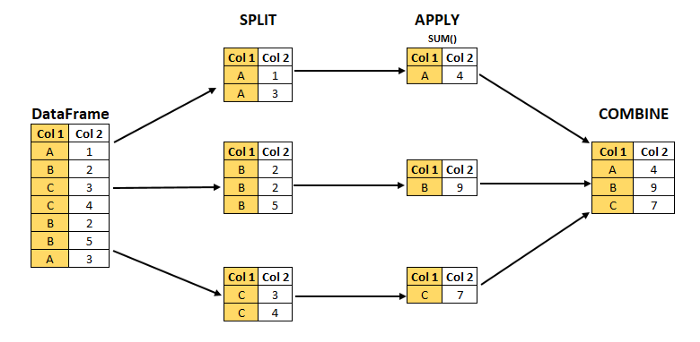

References:

- [Medium Blog Post](https://medium.com/analytics-vidhya/split-apply-combine-strategy-for-data-mining-4fd6e2a0cc99)
- [Pandas split-apply-combine](https://pandas.pydata.org/docs/user_guide/groupby.html)

Compter un DataFrame

In [ ]:
df.count()

Country             20
Region              20
Sales Person        20
Date of Purchase    20
Total               20
Quantity            20
dtype: int64

Compter une colonne

In [ ]:
df.Country.count()

20

In [ ]:
df.Country.unique()

array(['India', 'US', 'UK', 'Australia', 'South Africa', 'Singapore',
       'Malaysia'], dtype=object)

In [ ]:
df[df.Country != 'UK'].Total.sum()

29570000

In [ ]:
df.Quantity.median()

505.5

### Groupby

- Utilisé pour séparer les données en groupes selon un critère

In [ ]:
df

In [ ]:
for group in df.groupby('Country'):
    display(group)
    print("\n--------------------\n")

('Australia',
       Country Region Sales Person    Date of Purchase   Total  Quantity
 3   Australia   East         John   1/11/2014 0:00:00  160000      1000
 10  Australia  North         Bill    9/1/2015 0:00:00  120000       567
 17  Australia   West       Thomas  10/24/2012 0:00:00  260000        90)


--------------------



('India',    Country Region Sales Person    Date of Purchase   Total  Quantity
 0    India  North         John  12/25/2016 0:00:00  100000       567
 7    India   West         Bill   9/29/2014 0:00:00  240000       200
 14   India   East       Thomas   4/15/2018 0:00:00  200000        90)


--------------------



('Malaysia',
      Country Region Sales Person   Date of Purchase    Total  Quantity
 6   Malaysia   West         John  9/26/2010 0:00:00  1000000      7890
 13  Malaysia   East         Bill  10/3/2014 0:00:00   180000       444)


--------------------



('Singapore',
       Country Region Sales Person   Date of Purchase   Total  Quantity
 5   Singapore   East       Thomas  4/15/2015 0:00:00  200000      1000
 12  Singapore   East         John   3/6/2018 0:00:00  160000       892
 19  Singapore  North         Bill  9/21/2012 0:00:00  150000        85)


--------------------



('South Africa',
          Country Region Sales Person    Date of Purchase   Total  Quantity
 4   South Africa   East         Bill    7/9/2010 0:00:00  180000       123
 11  South Africa  North       Thomas  10/19/2016 0:00:00  140000      1000
 18  South Africa  North         John   10/1/2013 0:00:00  140000        85)


--------------------



('UK',    Country Region Sales Person    Date of Purchase   Total  Quantity
 2       UK  North       Thomas   3/30/2011 0:00:00  140000       345
 9       UK  North         John  11/10/2014 0:00:00  100000      1000
 16      UK   West         Bill  10/24/2014 0:00:00  240000        90)


--------------------



('US',    Country Region Sales Person   Date of Purchase     Total  Quantity
 1       US  North         Bill  1/20/2012 0:00:00    120000      3000
 8       US   West       Thomas  11/7/2011 0:00:00  26000000      1000
 15      US   West         John   3/5/2012 0:00:00    220000        90)


--------------------



In [ ]:
df.groupby('Country').mean()

,Total,Quantity
Country,,
Australia,1.800000e+05,552.333333
India,1.800000e+05,285.666667
Malaysia,5.900000e+05,4167.000000
Singapore,1.700000e+05,659.000000
South Africa,1.533333e+05,402.666667
UK,1.600000e+05,478.333333
US,8.780000e+06,1363.333333


In [ ]:
df.groupby(['Country', 'Sales Person']).mean()

Total  Quantity
Country      Sales Person                      
Australia    Bill            120000.0     567.0
             John            160000.0    1000.0
             Thomas          260000.0      90.0
India        Bill            240000.0     200.0
             John            100000.0     567.0
             Thomas          200000.0      90.0
Malaysia     Bill            180000.0     444.0
             John           1000000.0    7890.0
Singapore    Bill            150000.0      85.0
             John            160000.0     892.0
             Thomas          200000.0    1000.0
South Africa Bill            180000.0     123.0
             John            140000.0      85.0
             Thomas          140000.0    1000.0
UK           Bill            240000.0      90.0
             John            100000.0    1000.0
             Thomas          140000.0     345.0
US           Bill            120000.0    3000.0
             John            220000.0      90.0
             Thomas        26000000.0    1000.0

In [ ]:
df.groupby(['Country', 'Sales Person']).mean().index

MultiIndex([(   'Australia',   'Bill'),
            (   'Australia',   'John'),
            (   'Australia', 'Thomas'),
            (       'India',   'Bill'),
            (       'India',   'John'),
            (       'India', 'Thomas'),
            (    'Malaysia',   'Bill'),
            (    'Malaysia',   'John'),
            (   'Singapore',   'Bill'),
            (   'Singapore',   'John'),
            (   'Singapore', 'Thomas'),
            ('South Africa',   'Bill'),
            ('South Africa',   'John'),
            ('South Africa', 'Thomas'),
            (          'UK',   'Bill'),
            (          'UK',   'John'),
            (          'UK', 'Thomas'),
            (          'US',   'Bill'),
            (          'US',   'John'),
            (          'US', 'Thomas')],
           names=['Country', 'Sales Person'])

In [ ]:
df.groupby(['Country', 'Sales Person']).mean().reset_index()

,Country,Sales Person,Total,Quantity
0,Australia,Bill,120000.0,567.0
1,Australia,John,160000.0,1000.0
2,Australia,Thomas,260000.0,90.0
3,India,Bill,240000.0,200.0
4,India,John,100000.0,567.0
5,India,Thomas,200000.0,90.0
6,Malaysia,Bill,180000.0,444.0
7,Malaysia,John,1000000.0,7890.0
8,Singapore,Bill,150000.0,85.0
9,Singapore,John,160000.0,892.0


### Pivot

Pour cette section, tout le code et images sont empruntés de ce site:
- [Reference Blog Post (Nikolay Grozev)](https://nikolaygrozev.wordpress.com/2015/07/01/reshaping-in-pandas-pivot-pivot-table-stack-and-unstack-explained-with-pictures/)

La fonction pivot est utilisé pour créer un nouveau tableau à partir d'un autre tableau. La fonction prend 3 arguments: `index`, `columns`, and `values`.

```Python
DataFrame.pivot(index=None, columns=None, values=None)
```
Pour chacun de ces paramètres, vous devez spécifier un nom de colonne dans le tableau original.
Alors, la fonction de pivot va créer un nouveau tableau dont les indices des rangées et colonnes sont les valeurs uniques des paramètres respectifs.
Les valeurs des cellules du nouveau tableau sont pris de la colonne fournie par le paramètres `values`.


In [ ]:
table = dict((
    ("Item", ['Item0', 'Item0', 'Item1', 'Item1']),
    ('CType',['Gold', 'Bronze', 'Gold', 'Silver']),
    ('USD',  ['1$', '2$', '3$', '4$']),
    ('EU',   ['1€', '2€', '3€', '4€'])
))

df = pd.DataFrame(table)

In [ ]:
df

,Item,CType,USD,EU
0,Item0,Gold,1$,1€
1,Item0,Bronze,2$,2€
2,Item1,Gold,3$,3€
3,Item1,Silver,4$,4€


Par exemple, pour voir comment le prix des objects varient pour divers métaux précieux.

In [ ]:
df_piv = df.pivot(index='Item', columns='CType', values='USD')
df_piv

CType,Bronze,Gold,Silver
Item,,,
Item0,2$,1$,NaN
Item1,NaN,3$,4$


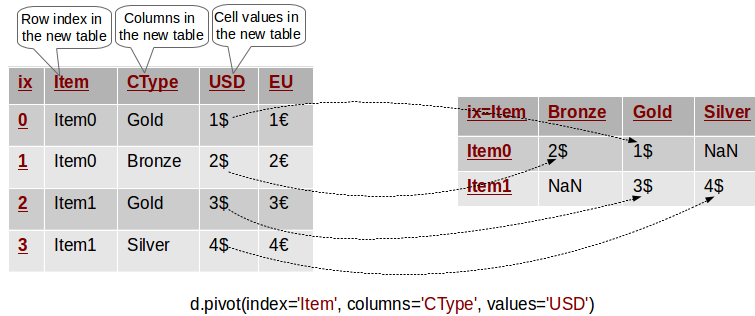

**Pivoter plusieurs colonnes**

Pour voir le prix en euros aussi, on peut omettre le paramètre values.

In [ ]:
df_piv = df.pivot(index='Item', columns='CType')
df_piv


USD                 EU            
CType Bronze Gold Silver Bronze Gold Silver
Item                                       
Item0     2$   1$    NaN     2€   1€    NaN
Item1    NaN   3$     4$    NaN   3€     4€

Dans ce cas Pandas, crée un index hiérarchique (**MultiIndex**) pour le nouveau tableau. C'est un peu comme un arbre d'indices. Chaque colonne et rangée peut être identifiée par une séquence unique du plus haut index au plus bas. Dans ce cas, le premier niveau d'index correspond à la devise et le deuxième le métal précieux. Ensemble, ils définissent un index unique

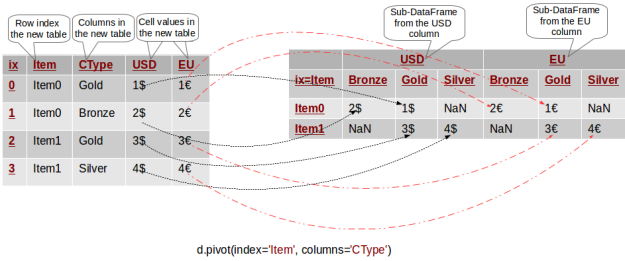

In [ ]:
df_piv.USD

CType,Bronze,Gold,Silver
Item,,,
Item0,2$,1$,NaN
Item1,NaN,3$,4$


**Pourquoi est-ce que `df.pivot()` ne fonctionne pas!?**

`df.pivot(index=None, columns=None, values=None)` prend deux noms de colonnes comme argument: `index` and `columns`.
Qu'est-ce qui va se passer si 2 rangées ont le même index après le pivot?
Comment est-ce que la fonction va déterminer la bonne valeur?

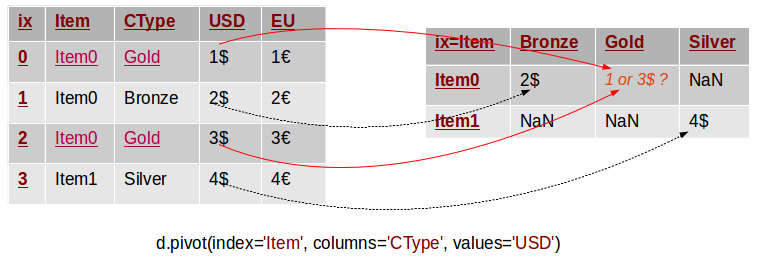

In [ ]:
table = dict((
    ("Item", ['Item0', 'Item0', 'Item0', 'Item1']),
    ('CType',['Gold', 'Bronze', 'Gold', 'Silver']),
    # Note that we remove the $ and € symbols with the benefit of foresight toward the solution...
    ('USD',  [1, 2, 3, 4]),
    ('EU',   [1.1, 2.2, 3.3, 4.4])
))
df = pd.DataFrame(table)
df

,Item,CType,USD,EU
0,Item0,Gold,1,1.1
1,Item0,Bronze,2,2.2
2,Item0,Gold,3,3.3
3,Item1,Silver,4,4.4


In [ ]:
df_piv = df.pivot(index='Item', columns='CType', values='USD')

ValueError: ignored

Pour éviter ce problème de doubles, on peut utiliser `pd.pivot_table()` au lieu de juste .pivot(). Le fonctionnement est similaire mais les valeurs de rangées avec des doubles sont agrégés utilisant une fonction de la section précédente.
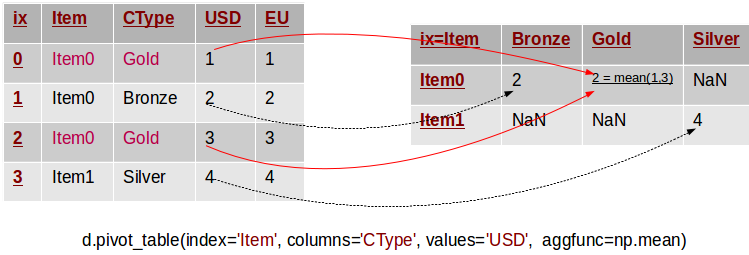

In [ ]:
import numpy as np

In [ ]:
df_piv = df.pivot_table(index='Item', columns='CType', values='USD', aggfunc=np.mean)
df_piv

CType,Bronze,Gold,Silver
Item,,,
Item0,2.0,2.0,NaN
Item1,NaN,NaN,4.0


### Stacking/Unstacking

C'est hors du cadre de ce labo mais c'est utile de savoir que pivoter est un case spécial de **stacking** un DataFrame.
Assumons que nous avons un DataFrame avec MultiIndices de rangées et de colonnes. Stacking un DataFrame signifie bouger (on peut aussi dire pivoter ou tourner) index de colonne le plus à l'intérieure pour devenir l'index de rangée le plus à l'intérieure to become the innermost row index. L'opération inverse s'appelle **unstacking**. Les deux opérations sont illustrées dans le diagramme suivant:

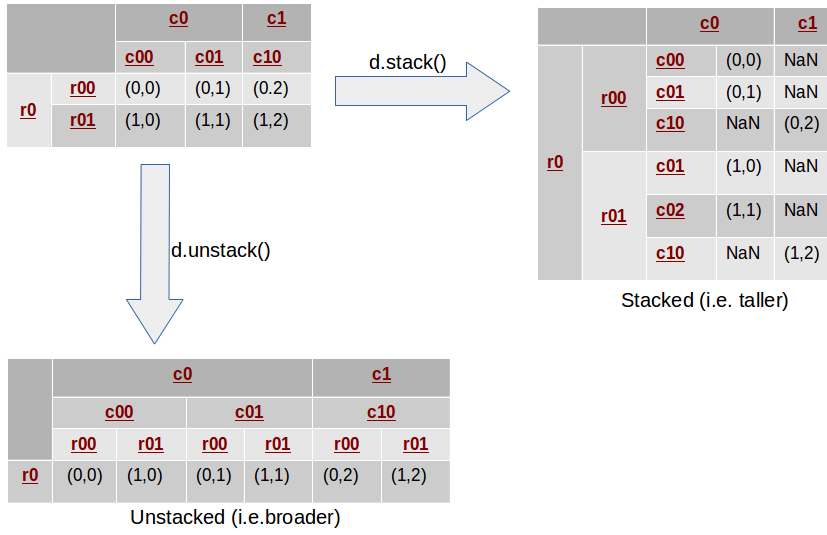

# [6] MISC

apply() à chaque colonne

In [ ]:
def convert_total(total,factor=1000):
    return total / factor

#new_df['total'] =
new_df.total.apply(convert_total)


0       100.0
1       120.0
2       140.0
3       160.0
4       180.0
5       200.0
6      1000.0
7       240.0
8     26000.0
9       100.0
10      120.0
11      140.0
12      160.0
13      180.0
14      200.0
15      220.0
16      240.0
17      260.0
18      140.0
19      150.0
Name: total, dtype: float64

In [ ]:
# Manipulez toutes les entrées de la colonne date en utilisant un lambda

new_df.date = new_df.date.apply(lambda x: x.split()[0])
new_df
# Note : x réfère à chaque valeur de la Series ('date')

,country,zone,person,date,total,qty
0,India,North,John,12/25/2016,100000,567
1,US,North,Bill,1/20/2012,120000,3000
2,UK,North,Thomas,3/30/2011,140000,345
3,Australia,East,John,1/11/2014,160000,1000
4,South Africa,East,Bill,7/9/2010,180000,123
5,Singapore,East,Thomas,4/15/2015,200000,1000
6,Malaysia,West,John,9/26/2010,1000000,7890
7,India,West,Bill,9/29/2014,240000,200
8,US,West,Thomas,11/7/2011,26000000,1000
9,UK,North,John,11/10/2014,100000,1000


apply() à toutes les colonnes

In [ ]:
num_df = new_df[['total','qty']]
str_df = new_df[['country','zone','person']]

num_df.apply(lambda x : x * 20)
# Note x réfère à chaque Series

,total,qty
0,2000000,11340
1,2400000,60000
2,2800000,6900
3,3200000,20000
4,3600000,2460
5,4000000,20000
6,20000000,157800
7,4800000,4000
8,520000000,20000
9,2000000,20000


apply() à chaque rangée

In [ ]:
def qty_percentage(row):
    return row['qty'] * 100 / row['total']

#new_df['qty_pc'] =
new_df.apply(qty_percentage, axis=1)

0      0.567000
1      2.500000
2      0.246429
3      0.625000
4      0.068333
5      0.500000
6      0.789000
7      0.083333
8      0.003846
9      1.000000
10     0.472500
11    71.428571
12     0.557500
13    24.666667
14     0.045000
15     4.090909
16     0.037500
17     3.461538
18     0.060714
19     5.666667
dtype: float64

Fonctions graphiques

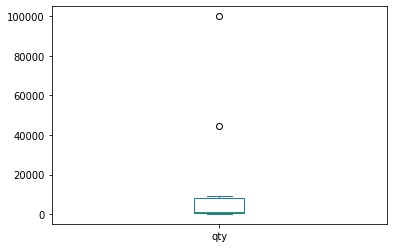

In [ ]:
new_df.qty.plot(kind='box');

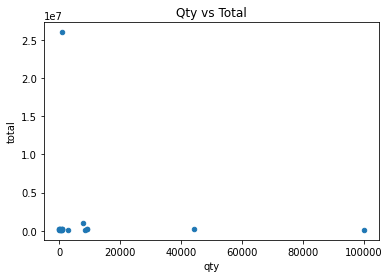

In [ ]:
new_df.plot(kind='scatter', x='qty', y='total', title='Qty vs Total');

## EXERCISES

#### 1. Essayez de chargez le fichier `sample_data/california_housing_train.csv` dans un `DataFrame` et faire une exploration de données de base pour comprendre ces données.

In [ ]:
# TODO

Déterminez s'il y a des NaNs dans ce dataframe.

In [ ]:
# TODO

Trouvez la population totale du Dataframe.

In [ ]:
# TODO

Retournez un Dataframe avec `*n*` éléments échantillonnés aléatoirement du DataFrame.

In [ ]:
n = 10
# TODO

Sélectionnez les rangées ou `housing_median_age` est en-dessous de 18 et `median_house_value` est au-dessus de 300,000.

In [ ]:
# TODO

#### 2. Utilisons les données de ventes:

In [ ]:
df = pd.read_csv('sales.csv')

Trouvez programmatiquement le nombre de pays unique de la base de données.

In [ ]:
# TODO

Triez le df avec les valeurs de la colonne 'Country' en ordre croissant et ensuite par les valeurs de la colonne 'Sales Person' en ordre décroissant.

In [ ]:
# TODO

#### 3. Avec un DataFrame de nombres aléatoires:

In [ ]:
import numpy as np
df = pd.DataFrame(np.random.random(size=(5, 3)))

Soustrayez la moyenne de chaque chiffre.

In [ ]:
# TODO

#### 4. Comptez le nombre de rangées uniques d'un DataFrame (c'est à dire ignorez les rangées doubles)?

In [ ]:
# Given this dataframe
df = pd.DataFrame(np.random.randint(0, 2, size=(10, 3)))

# TODO

#### 5. Nettoyez un DataFrame

In [ ]:
import numpy as np
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm',
                               'Budapest_PaRis', 'Brussels_londOn'],
              'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )',
                               '12. Air France', '"Swiss Air"']})

Certaines valeures de la colonne **FlightNumber** manquent (ils sont `NaN`). Les numéros de vols sont supposés d'augmenter de 10 à chaque rangée alors il faut ajouter 10055 et 100075. Modifiez `df` en ajoutant ces valeurs manquantes et transformez la colonne en colonne d'entiers.

In [ ]:
# TODO

La colonne **From\_To** serait meilleure en tant que deux colonnes différentes. Créez un nouveau DataFrame appelé 'temp' avec les colonnes séparées le long du tiret bas. Assignez les noms appropriés à ces colonnes

In [ ]:
# TODO

Les majuscules sont un peu partout dans les noms de villes. Dans 'temp', assurez vous que les chaîne de charactères sont standardisées avec juste la première lettre majuscule (par exemple "London").

In [ ]:
# TODO

Supprimez la colonne **From_To** de `df` et attachez le df temporaire 'temp' des questions précédentes.

In [ ]:
# TODO

#### 6. Regardez le notebook de la semaine dernière [ici](https://colab.research.google.com/drive/1w77xXy6TxaV2yo8rEzvHjuM4NzGMgTfL#scrollTo=faxVdJ0l1sRk) et examinez la section 6 Seaborn. Chargez la base de données sur les penguins mentionnée dans le carnet et répondez aux questions suivantes:

a. Combien de penguins n'ont pas de genre assigné?

b. Nettoyez les données d'une manière appropriée sans supprimer de rangées.

c. Visualisez les données dans un graphique de votre choix et devinez les genres possibles des penguins sans genre assigné.

In [ ]:
#TODO

### RÉFÉRENCES

1.   Datacamp Pandas [cheatsheet](https://www.dataquest.io/blog/pandas-cheat-sheet/)
2.   Morphcode [cheatsheet](https://morphocode.com/pandas-cheat-sheet/)
3.  U Idaho [reference](https://www.webpages.uidaho.edu/~stevel/504/Pandas%20DataFrame%20Notes.pdf)
4. Pandas Puzzles [reference](https://github.com/ajcr/100-pandas-puzzles)

